# DecisionTreeRegressor (v2)
> 
- toc: true
- badges: false
- comments: true
- author: Cécile Gallioz
- categories: [sklearn, v2]

# Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import time

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)
data, target = housing.data, housing.target
target *= 100 # rescale the target in k$

In [3]:
print(f"The dataset data contains {data.shape[0]} samples and {data.shape[1]} features")

The dataset data contains 20640 samples and 8 features


In [4]:
data.dtypes

MedInc        float64
HouseAge      float64
AveRooms      float64
AveBedrms     float64
Population    float64
AveOccup      float64
Latitude      float64
Longitude     float64
dtype: object

In [5]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [6]:
target.head()

0    452.6
1    358.5
2    352.1
3    341.3
4    342.2
Name: MedHouseVal, dtype: float64

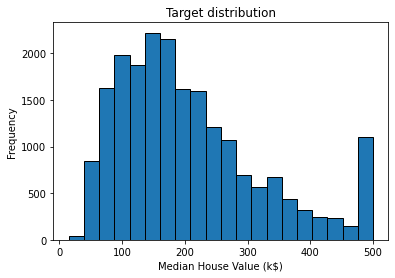

In [7]:
target.plot.hist(bins=20, edgecolor="black")
plt.xlabel("Median House Value (k$)")
_ = plt.title("Target distribution")

# Overfitting : bad testing error

## R2

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
# 

model = DecisionTreeRegressor(random_state=0)

cv = ShuffleSplit(n_splits=10, test_size=0.3, random_state=0)

cv_results = cross_validate(model, data, target, cv=cv, return_train_score=True)

scores = cv_results["test_score"]
train_scores = cv_results["train_score"]
fit_time = cv_results["fit_time"]

print("The accuracy in TEST  is "
      f"{scores.mean():.3f} +/- {scores.std():.3f}, for {fit_time.mean():.3f} seconds")
print("The accuracy in TRAIN is "
      f"{train_scores.mean():.3f} +/- {train_scores.std():.3f}")

The accuracy in TEST  is 0.605 +/- 0.014, for 0.106 seconds
The accuracy in TRAIN is 1.000 +/- 0.000


In [9]:
cv_results = cross_validate(model, data, target, cv=cv, scoring="r2", return_train_score=True)

scores = cv_results["test_score"]
train_scores = cv_results["train_score"]
fit_time = cv_results["fit_time"]

print("The accuracy in TEST  is "
      f"{scores.mean():.3f} +/- {scores.std():.3f}, for {fit_time.mean():.3f} seconds")
print("The accuracy in TRAIN is "
      f"{train_scores.mean():.3f} +/- {train_scores.std():.3f}")

The accuracy in TEST  is 0.605 +/- 0.014, for 0.106 seconds
The accuracy in TRAIN is 1.000 +/- 0.000


## neg_mean_absolute_error

In [10]:
cv_results = cross_validate(model, 
                            data, target, 
                            cv=cv, 
                            scoring="neg_mean_absolute_error",
                            return_train_score=True)

cv_results = pd.DataFrame(cv_results)

scores = cv_results["test_score"]
train_scores = cv_results["train_score"]

fit_time = cv_results["fit_time"]

scores = -cv_results["test_score"]
train_scores = -cv_results["train_score"]
fit_time = cv_results["fit_time"]

print("The mean absolute error (k$) in TEST  is "
      f"{scores.mean():.3f} +/- {scores.std():.3f}, for {fit_time.mean():.3f} seconds")
print("The mean absolute error (k$) in TRAIN is "
      f"{train_scores.mean():.3f} +/- {train_scores.std():.3f}")

The mean absolute error (k$) in TEST  is 46.266 +/- 0.961, for 0.109 seconds
The mean absolute error (k$) in TRAIN is 0.000 +/- 0.000
